Import Load dataset via pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

pd.options.mode.copy_on_write = True

data = pd.read_csv("data/Advertising.csv",index_col=0)
data.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


Separate sales from dataset

In [2]:
sales = data.Sales.values
data = data.drop(['Sales'], axis = 1)

Split dataset into training and testing before applying standardization to avoid unintended bias

In [3]:
data_train, data_test, sales_train, sales_test = train_test_split(data, sales, test_size=0.25, random_state = 200)

Standardizing columns

In [4]:
data_train = preprocessing.scale(data_train)
data_test = preprocessing.scale(data_test)
sales_train = preprocessing.scale(sales_train)
sales_test = preprocessing.scale(sales_test)

Add a column of 1 to both datasets

In [5]:
data_train = np.c_[np.ones(len(data_train)), data_train]
data_test = np.c_[np.ones(len(data_test)), data_test]

Written functions for gradient descent

Initialize weights

In [6]:
def initialize_weights(randomize = False):
    if randomize:
        return np.random.rand(4)
    else:
        return np.zeros(4)

Predict values based on weights

In [7]:
def predict(weights, predictors):
    return np.dot(weights,predictors.T)

Calculate cost function

In [8]:
def compute_cost(predicted, actual):
    errors = np.subtract(predicted, actual)
    sqrd_err = errors ** 2
    mse = np.sum(sqrd_err) / (2 * len(actual))
    return mse

Compute gradient using the partial derivatives of each predictor

In [9]:
def compute_gradient(data, predicted, actual):
    error = np.subtract(predicted, actual)
    gradient = (np.dot(error,data)) / len(data)
    return gradient

Update weights based on the learning rate

In [10]:
def update_weights(weights, gradient, learning_rate):
    return weights - (learning_rate * gradient)

Place all previous functions into the gradient descent function

In [11]:
def grad_descent(data_train, result_train, alpha = 0.1, iterations = 50, d_test=None, s_test=None):
    weights = initialize_weights(randomize=False)
    cost_values = []
    costs = []
    for _ in range(iterations):
        predicted = predict(weights, data_train)
        cost_values.append(compute_cost(predicted, result_train))
        if s_test.size != 0:
            costs.append(compute_cost(predict(weights, d_test),s_test))
        gradient = compute_gradient(data_train, predicted, result_train)
        weights = update_weights(weights, gradient, alpha)
    return weights, cost_values, costs

Create a function to show the cost over iteration

In [12]:
def plot_costs(cost_values, costs):
    plt.plot(cost_values, '-o', markersize=0.1)
    plt.plot(costs, '-o', markersize=0.1)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.legend(["Train","Test"])
    plt.title("Cost as function of Iteration")

Final train cost:  0.04334850767528342
Final test cost:  0.07311550289240173

Final weights
Bias:       -5.9489450402831116e-18
TV:         0.7223276051955809
Radio:      0.5520952794924877
Newspaper:  0.019513677073720242


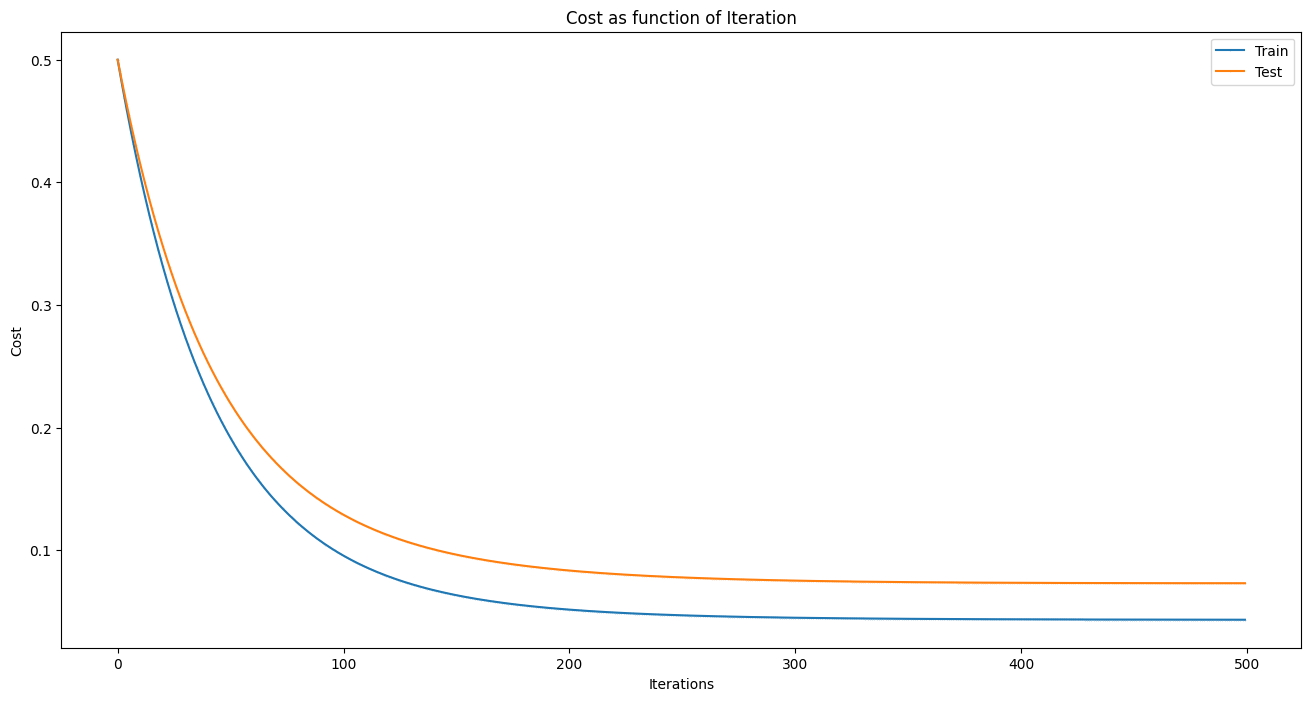

In [13]:
weights, cost_values, costs = grad_descent(
    np.copy(data_train), 
    np.copy(sales_train), 
    alpha = 0.01, 
    iterations = 500, 
    d_test = np.copy(data_test), 
    s_test = np.copy(sales_test)
)
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)
plot_costs(cost_values, costs)

test = predict(weights, data_test)
print("Final train cost: ", cost_values[-1])
print("Final test cost: ", costs[-1])

print("\nFinal weights")
print("Bias:      ",weights[0])
print("TV:        ",weights[1])
print("Radio:     ",weights[2])
print("Newspaper: ",weights[3])

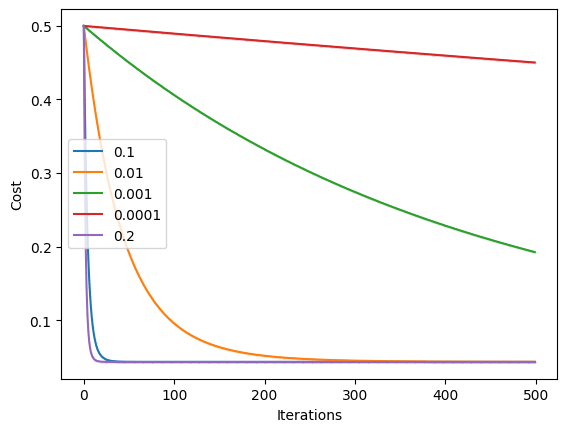

In [14]:
list_alpha = [0.1,0.01,0.001,0.0001,0.2]

for x in list_alpha:
    weights, cost_values, costs = grad_descent(
        np.copy(data_train), 
        np.copy(sales_train), 
        alpha = x, 
        iterations = 500, 
        d_test = np.copy(data_test), 
        s_test = np.copy(sales_test)
    )
    plt.plot(cost_values, '-o', markersize=0.1)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend(list_alpha)

Plot scatterplot

Train Score: 90.53665418007652
Test Score: 82.54153867404732


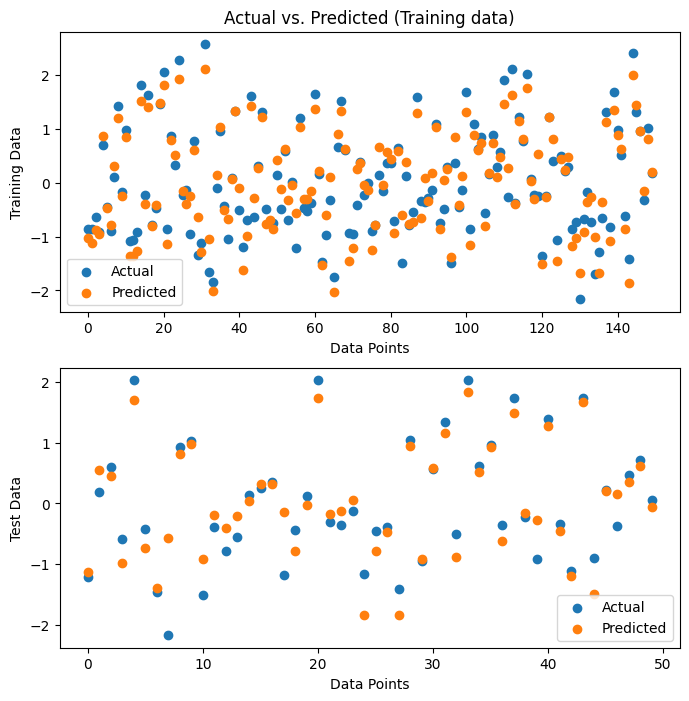

In [15]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.subplot(2,1,1)
plt.scatter(np.arange(len(sales_train)),sales_train)
plt.scatter(np.arange(len(sales_train)),predict(weights, data_train))
plt.xlabel("Data Points")
plt.ylabel("Training Data")
plt.legend(["Actual","Predicted"])
plt.title("Actual vs. Predicted (Training data)")
plt.subplot(2,1,2)
plt.scatter(np.arange(len(sales_test)),sales_test)
plt.scatter(np.arange(len(sales_test)),predict(weights, data_test))
plt.xlabel("Data Points")
plt.ylabel("Test Data")
plt.legend(["Actual","Predicted"])
# Test for accuracy using R^2
accuracy = r2_score(predict(weights, data_train), sales_train)
print("Train Score: " + str(accuracy*100))
accuracy = r2_score(test, sales_test)
print("Test Score: " + str(accuracy*100))

Using scikit-learn for least squares regression

In [56]:
model = LinearRegression().fit(data_train, sales_train)
score = model.score(data_train, sales_train)
weights = model.coef_
weights[0] = model.intercept_
print("Weights: ", end = "")
[print(str(weight), end=",") for weight in weights]
print("\nTraining Score: ", score)
print("Test Score: ", model.score(data_test, sales_test))

Weights: 1.6135405258427933e-17,0.7260803717700971,0.5656195242231317,0.005325462527041025,
Training Score:  0.9135478113788749
Test Score:  0.8530846605097633
